# Ejercicio 1
Evaluar la funcion en el intervalo [0,3] con precision de 0.001.

In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def f(x):
  global c
  c +=1
  return ( 0.65- (0.75/(1+x**2)) - (0.65*x * math.atan(1/x)) )

In [11]:
def g(x):
  global c
  c +=1
  return(x**2+(54/(x+10)))

In [4]:
def h(x):
    global c
    c+=1
    return ((x**2)+ (54/(x)))

Busqueda Exhaustiva

In [122]:
def busqueda_ex(inicio: int, fin : int, divisiones ,funcion):
  global c
  if type(divisiones) ==  type(0.):
    divisiones = (2 * (fin-inicio))/divisiones
    #print(divisiones)
  incremento= (abs(fin-inicio))/divisiones
  x1=inicio
  x2=x1+incremento
  x3=x2+incremento
  intervalo=(inicio,fin)
  c=0
  valores_f= []
  while x3 <= fin:
      if x3 == 0 or x2 ==0 or x1 == 0:
          x1=x2
          x2=x3
          x3=x2+incremento
      else:
          if len(valores_f) == 3:
              fx1 = valores_f[1]
              fx2 =valores_f[2]
              valores_f.pop()
              fx3 = funcion(x3)
              valores_f.append(fx3)
          else:
              fx1,fx2,fx3=funcion(x1),funcion(x2),funcion(x3)
              valores_f.append(fx1)
              valores_f.append(fx2)
              valores_f.append(fx3)
          if fx2 <= fx1 and fx2 <= fx3:
              intervalo= (x1,x3)
              break
          x1=x2
          x2=x3
          x3=x2+incremento
  res="("+"{:.3f}".format(intervalo[0])+","+"{:.3f}".format(intervalo[1])+")"
  print('El mimimo se encuentra en el intervalo: ',res)
  print('Se llamó a la funcion objetivo un total de ',c,'veces')

Intervalos por mitad

In [10]:
def Intervalos_mitad(a : int,b : int,epsilon : float, f):
    global c
    c = 0
    l = abs(b-a)
    x1 = a + l/4
    x2 = b - l/4
    xm = a + ((b-a)/2)
    fm= f(xm)

    while l > epsilon:
      f1 = f(x1)
      f2 = f(x2)
      if f1 < fm:
        b = xm
        fm = f1
        xm = x1
      else:
          if f2 < fm:
            a = xm
            xm = x2
            fm = f2
          else:
            a = x1
            b = x2
            
      l = abs(b-a)
      x1 = a + l/4
      x2 = b - l/4 
    print('El minimo se encuentra en el intervalo:','({:.4f},{:.4f})'.format(a,b))
    print('Se llamó a la funcion objetivo',c,'veces')


Implementacion fibonacci

In [8]:
def busqueda_fibonacci(a : int,b : int,n : int,f):
  global c
  c =-1 #inicio en -1, ya que por como implementé el algoritmo hice una llama más de las necesarias a la funcion objetivo
  l = b-a
  k = 2
  valores = [1,1]

  if type(n) == type(0.): #verificamos si n es flotante, so lo es, asumimos que es un epsilon, y calculamos la n para obtenerlo
    while l/n > valores[-1]:
      valores.insert((valores[-1]+1),(valores[-1]+valores[-2]))
    n = len(valores)-1
    #print(valores)
    #print(n)
  else:
    for i in range(2,int(n+1)):
        valores.append((valores[i-2]+valores[i-1]))

  lk = ((valores[int(n-k)]/valores[int(n)])*l)
  x1 = a + lk
  x2 = b - lk
  f1 = f(x1)
  f2 = f(x2)
  while k <= n:
      if f1 > f2:
          a = x1
          x1 = x2
          k+=1
          lk = ((valores[int(n-k)]/valores[int(n)])*l)
          f1 = f2
          x2 = b -lk
          f2 = f(x2)
      else:
          b = x2
          x2 = x1
          k +=1
          lk = ((valores[int(n-k)]/valores[int(n)])*l)
          f2 = f1
          x1 = a + lk
          f1 = f(x1)
  print('El minimo se encuentra en el intervalo','({},{})'.format("%.4f"%a,"%.4f"%b))
  print('Se llamo a la funcion objetivo',c,'veces')

Seccion dorada

In [2]:
def seccion_dorada(a : int, b : int, epsilon : float, f):
  global c
  c =-1 #inicio c en -1 ya que estoy haciendo una llamda de mas a la función, y no se me ocurrió como evitarlo
  def Normalizar(x):
    #global a,b
    return ( (x-a)/(b-a))

  def DesNormalizar(x):
    #global a,b
    return ((x*(b-a)) + a)
  
  a_norm = 0
  b_norm = 1
  l_norm = 1
  x1_norm = a_norm + 0.618*l_norm
  x2_norm = b_norm - 0.618*l_norm
  fx1 = f(DesNormalizar(x1_norm))
  fx2 = f(DesNormalizar(x2_norm))
  while l_norm > epsilon/(b-a):
    #print(DesNormalizar(x1_norm),DesNormalizar(x2_norm))
    #print(fx1,fx2)
    if fx1 < fx2:
      a_norm = x2_norm
      x2_norm = x1_norm
      fx2 = fx1
      l_norm = b_norm - a_norm
      x1_norm = a_norm + 0.618*l_norm
      fx1 = f(DesNormalizar(x1_norm))
    else:
      b_norm = x1_norm
      x1_norm = x2_norm
      fx1 = fx2
      l_norm = b_norm - a_norm
      x2_norm = b_norm - 0.618*l_norm
      fx2 = f(DesNormalizar(x2_norm))
    l_norm = b_norm - a_norm
  print('El minimo se encuentra en el intervalo: ')
  print('({:.4f},{:.4f})'.format(DesNormalizar(a_norm),DesNormalizar(b_norm)))
  print('Se llamó a la funcion objetivo un total de: ', c, ' veces')

In [171]:
busqueda_ex(0,3,0.001,f)

El mimimo se encuentra en el intervalo:  (0.481,0.482)
Se llamó a la funcion objetivo un total de  963 veces


In [13]:
Intervalos_mitad(0,3,0.001,f)

El minimo se encuentra en el intervalo: (0.4805,0.4812)
Se llamó a la funcion objetivo 25 veces


In [7]:
seccion_dorada(0,3,0.001,f)

El minimo se encuentra en el intervalo: 
(0.4802,0.4811)
Se llamó a la funcion objetivo un total de:  18  veces


In [9]:
busqueda_fibonacci(0,3,0.001,f)

El minimo se encuentra en el intervalo (0.4800,0.4807)
Se llamo a la funcion objetivo 18 veces


# Ejercicio 2
Validar el numero de evaluaciones realizadas, con las 
evaluaciones teoricas.
Para las ecuaciones, usaré la siguiente notación.
$ln$ = longitud del intervalo tras n iteraciones.

$L$ = longitud del intervalo, se obtiene con $ b - a$ donde $a$ es el punto inicial y $b$ el final del intervalo a evaluar.

$n$ = numero de iteraciones.

$\epsilon$ = precisión minima requerida.

$Ln$ = longitud del intervalo tras n llamadas a la funcion.

Para este ejercicio, se tienen los siguientes valores:

$L$ = 3
$\epsilon$ = 0.001


## Busqueda exhaustiva
su formula para calcular la longitud del intervalo resultante es: $ln =\frac{2L}{n} $, como $ln$ es el tamaño final, y se pide una precision de$\epsilon$, tomamos $ LN $ como $\epsilon$

$\epsilon =\frac{2L}{n} $

$\epsilon*n = 2L$

$n = \frac{2L}{\epsilon}$

Sustituyendo los valores $L y \epsilon$ nos queda:

$n = \frac{2*3}{0.001}$

$n = \frac{6}{0.001}$

$n = 6000$

#Comparación
En la practica el algoritmo hizo muchas menos llamadas que las teóricas, no llegó ni a mil, esto debido a que ese numero es en el peor de los casos.


## Division por mitad.
Su formula es:
$Ln =  (\frac{1}{2})^\frac{n}{2} L$

Cambiando $Ln$ por $\epsilon$ y despejando para obtener cuantas llamadas a la funcion se deben hacer, nos queda:

$\epsilon L =  (\frac{1}{2})^\frac{n}{2} $

$ \log_{1/2}{\epsilon L} = \log_{1/2}{(\frac{1}{2})^\frac{n}{2}}$

$ \log_{1/2}{\epsilon L} = \frac{n}{2}$

$ 2\log_{1/2}{\epsilon L} = n$

Sustituyendo los valores nos queda:
$ n = 2\log_{1/2}{0.001* 3}$

$n \eqsim 23.10149$

#comparación
En la practica se mandó a llamar 25 veces, desconozco el motivo por el cual se llamo dos veces más, pero el algoritmo está bien, ya que pasó todos los casos de prueba en hackerrank.

## Seccion dorada.
Su formula es:

$ 0.618^{n-1} * L = Ln $

Nuevamente, cambiando $Ln$ por $\epsilon$ que es a lo que queremos llegar de longitud final, nos queda:

$ 0.618^{n-1} * L = \epsilon $

Despejamos.

$ 0.618^{n-1} = \frac{\epsilon}{L} $

$ log_{(0.618)}{0.618^{n-1}} = log_{0618}{\frac{\epsilon}{L}} $

$ n-1 = log_{(0618)}{\frac{\epsilon}{L}} $

$ n = log_{(0618)}{\frac{\epsilon}{L}} + 1 $

Sustituimos y nos queda:

$ n = log_{(0.618)}{\frac{0.001}{3}} + 1 $

$ n \eqsim 17.63603 $

#Comparación
Hizo 18 llamadas, considero está bien, ya qué si redondeamos la n, nos daría 18.

## Busqueda fibonacci
Su formula es:
 $ Ln = \frac{1}{Fn}L$ donde $Fn$ es el valor de la sucesion Fibonacci en la posicion $n$.

 Despejamos para obtener el valor de Fn, para despues calcular en que n se da un valor mayor o igual al requerido.
 Lo primero es cambiar $Ln$ por $\epsilon$, ya que es la longitud maxima que queremos que tenga el intervalo despues de n llamadas a la función.


 $ \epsilon = \frac{1}{Fn}L$ $\rightarrow$
 $ \epsilon = \frac{L}{Fn}\rightarrow$
  $ \epsilon * Fn = L \rightarrow Fn = \frac{l}{\epsilon}$

Sustituimos y nos queda:
 $ Fn = \cfrac{3}{0.001}$ $\rightarrow$ $Fn = 3000$

 Buscamos en qué posición de la sucesion fibonacci aparece un valor igual o mayor a 3000, para el ejercicio se consideró que la sucesion empieza en 1,1. Con lo cual, la posición 18 es la primera en ser mayor a 3000, y entonces $n$ = 18.

#Comparación
hizo las 18 y se calcularon 18, justamente hizo lo calculado.



# Ejercicio 3
Grafica de la funcion en el intervalo [0,3]


In [22]:
def f(x):
  return ( 0.65- (0.75/(1+x**2)) - (0.65*x * math.atan(1/x)) )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


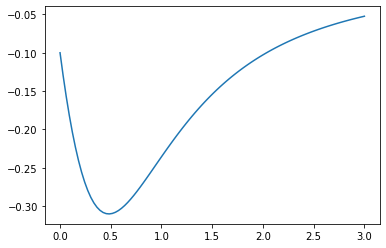

In [26]:
x = np.linspace(0,3,100)
plt.plot(x, [f(_) for _ in x])
plt.show()

#Ejercicio 4
Indique cuál es el método más eficiente y porqué.

Considero que el más eficiente es Seccion Dorada, debido a que obtiene resultados muy cercanos a Fibonacci, el cuál es quien tiene mayor precisión en el intervalo, con la misma cantidad de llamadas a la función objetivo, pero sin tener que guardar valores adicioneles en memoria.